## Regresión Lineal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(boston.data, boston.target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
list(zip(boston.feature_names, rl.coef_))

[('CRIM', -0.10801135783679588),
 ('ZN', 0.04642045836688287),
 ('INDUS', 0.020558626367071474),
 ('CHAS', 2.6867338193448775),
 ('NOX', -17.766611228299745),
 ('RM', 3.809865206809219),
 ('AGE', 0.0006922246403434891),
 ('DIS', -1.4755668456002524),
 ('RAD', 0.3060494789851694),
 ('TAX', -0.012334593916574377),
 ('PTRATIO', -0.9527472317072883),
 ('B', 0.009311683273793454),
 ('LSTAT', -0.5247583778554901)]

In [5]:
predicciones = rl.predict(boston.data)
predicciones_df = pd.DataFrame(predicciones, columns = ['Pred'])
predicciones_df.head()

,Pred
0,30.003843
1,25.025562
2,30.567597
3,28.607036
4,27.943524


In [6]:
#error medio
np.mean(boston.target- predicciones)

3.201655014887408e-15

## Regresion logistica

In [7]:
# Data set de eejmplo
from sklearn.datasets import make_classification
X, y = make_classification(n_samples= 1000, n_features= 4)



In [8]:
#importamos el modelo
from sklearn.linear_model import LogisticRegression

rlog = LogisticRegression()

X_entrenamiento = X[:-200] #800 Datos
X_evaluacion = X[-200:] #200 Datos
y_entrenamiento = y[:-200] #800 Datos
y_evaluacion = y[-200:] #200 Datos

rlog.fit(X_entrenamiento, y_entrenamiento) # Ajustando el modelo

#predicciones

y_pred_entr = rlog.predict(X_entrenamiento)
y_pred_eval = rlog.predict(X_evaluacion)




In [9]:
entrenamiento = (y_pred_entr == y_entrenamiento).sum().astype(float)/y_entrenamiento.shape[0]
evaluacion = (y_pred_eval == y_evaluacion).sum().astype(float)/y_evaluacion.shape[0]
print("sobre datos de entrenamiento: {0:.2f}".format(entrenamiento))
print("sobre datos de evaluación: {0:.2f}".format(evaluacion))

sobre datos de entrenamiento: 0.93
sobre datos de evaluación: 0.91


## Arboles de decisión

In [10]:
from sklearn import datasets
X,y = datasets.make_classification(1000, 40, n_informative= 3)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

ad = DecisionTreeClassifier(criterion= "entropy", max_depth= 8)
ad.fit(X,y)

with open('arbol.dot', 'w') as arc:
    tree.export_graphviz(ad, out_file= arc)

In [11]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Users/supervisor.o109/Downloads/graphviz-2.38/release/bin/'

!dot -Tjpeg arbol.dot -o arbol2.jpeg

<img src = "arbol2.jpeg">

In [12]:
# verificando la precisión

print("presición del modelo: {0: .1f}%".format(100*(y == ad.predict(X)).mean()))

presición del modelo:  97.0%


## Random Forest

In [40]:
X, y = datasets.make_classification(200)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

pred = rf.predict(X)

print ("presición del modelo: {0: .2f}%".format(100*(y == pred).mean()))

presición del modelo:  100.00%


## SVM Maquinas de Vectores de Soporte
La idea detrás de SVM es encontrar un plano que separe los grupos dentro de los datos de la mejor forma posible. Aquí, la separación significa que la eleción del plano maximiza el margen entre los puntos más cercanos en el plano; éstos puntos se denominan bectores de soporte

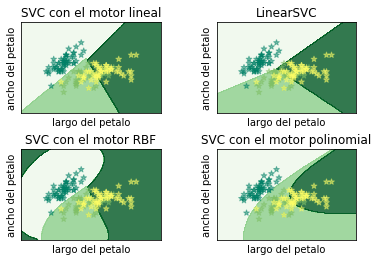

In [154]:
from sklearn import  svm

iris = datasets.load_iris()
X = iris.data[:, :-2]
y = iris.target

h = .02

C = 1.0
svc = svm.SVC(kernel = 'linear', C = C).fit(X,y)
rbf = svm.SVC(kernel = 'rbf',gamma = 0.7, C = C).fit(X,y)
ply = svm.SVC(kernel = 'poly', degree = 5, C = C).fit(X,y)
lin = svm.LinearSVC(C = C).fit(X,y)

# crear el área para gráficar
xm, xM = X[:,0].min() - 1, X[:,0].max() + 1
ym, yM = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(xm,xM,h),
                     np.arange(ym,yM,h))

#titulos
titles = ['SVC con el motor lineal',
          'LinearSVC',
          'SVC con el motor RBF',
          'SVC con el motor polinomial']

for i, clf in enumerate((svc, lin, rbf, ply)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap = plt.cm.Greens, alpha = 0.8)

    #graficar los puntos

    plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.summer, alpha=.5,marker='*')
    plt.xlabel('largo del petalo')
    plt.ylabel('ancho del petalo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
    

In [159]:
X[:1]

array([[5.1, 3.5]])

In [141]:
Iris_DF["TARGET"] = iris.target

In [142]:
Iris_DF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## KNN o K vecinos más cercanos
Este es un método de clasificación no paramétrico, que estima el valor de probabilidad a posteriori de que un elemento $x$ pertenezca a una clase en particular a partir de la información proporcionada por el conjunto de prototipos. La regresión KNN se calcula simplemente tomando el promedio del punto k más cercano al punto que se está probando.

In [143]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

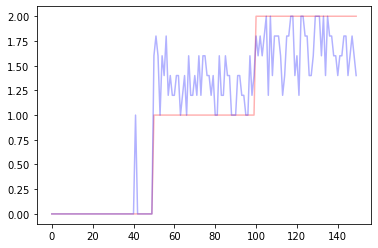

In [195]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X,y)
yp = knnr.predict(X)

plt.plot(range(len(y)),y, c = 'r',alpha=0.3)
plt.plot(range(len(y)),yp,c = 'b',alpha=0.3)
plt.show()

In [196]:
print('el error medio del modelo es: {: .2f}'.format(np.power(y-yp,2).mean()))

el error medio del modelo es:  0.11


## K-means
K-means es probablemente uno de los algoritmos de agrupamiento más conocidos y, en un sentido más amplio, una de las técnicas de aprendizaje no supervizado más conocidas. K-means es en realidad un algoritmo muy simple que funciona para reducir al mínimo la suma de las distancias cuadradas desde la media dentro del agrupamiento. Para acer esto establlece primero un número previamente especificado de conglomerados $k$, y lugo va asignando cada observación a la agrupación más cercana en cuanto a su medida.



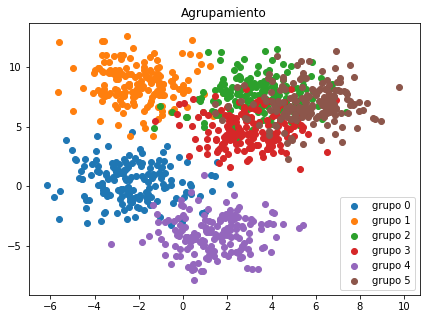

In [222]:
n = 6
grupos, pos_correcta = datasets.make_blobs(1000, centers = n, cluster_std = 1.5)
f, ax = plt.subplots(figsize = (7,5))

for i in range(n):
    p = grupos[pos_correcta == i]
    ax.scatter(p[:,0],p[:,1], label = "grupo {}".format(i))

ax.set_title("Agrupamiento")
ax.legend()
plt.show()


In [224]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = n)
kmeans.fit(grupos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

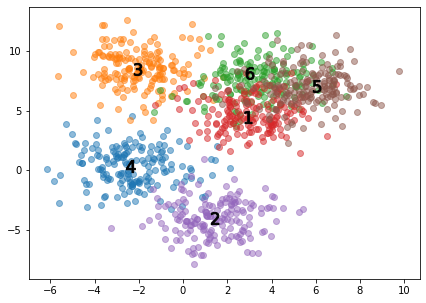

In [259]:
f, ax = plt.subplots(figsize = (7,5))

for i in range(n):
    p = grupos[pos_correcta == i]
    ax.scatter(p[:,0], p[:,1], label = 'Grupo {}'.format(i), alpha = 0.5)
for i in range(n):
    ax.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1], s = 150, color = "black",   label = 'centros', marker = '${}$'.format(i+1) )